In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Import Data

In [2]:
#####################################################################
### !!! This csv import to be replaced by import from DB instance !!!
### !!! For model design only !!!
#####################################################################

# Read CSV data and verify
sparse_covid_df = pd.read_csv('../data/covid/sparse_county_covid.csv',index_col=0)
dense_covid_df = pd.read_csv('../data/covid/dense_county_covid.csv',index_col=0)
weather_df = pd.read_csv('../data/weather/county_weather.csv',index_col=0)

# Transform Data

In [3]:
# Add population density and total population values
density = {
    'baltimore': 6866,
    'essex': 6168,
    'cook': 5301,
    'union': 5150,
    'norfolk': 5026,
    'nassau': 4954,
    'harrisonburg':4765,
    'fairfax':2454,
    'camden':2289,
    'harris':2700,
    'franklin':2186,
    'marion':2466,
    'dekalb':2482,
    'duval':1305,
    'wake':1377,
    'bexar':1620
}

population = {
    'baltimore': 621342,
    'essex': 755618,
    'cook': 5231351,
    'union': 543976,
    'norfolk': 245782,
    'nassau': 74629,
    'harrisonburg':50981,
    'fairfax':1118602,
    'camden':513539,
    'harris':4253700,
    'franklin':1195537,
    'marion':918977,
    'dekalb':707089,
    'duval':879602,
    'wake':952151,
    'bexar':1785704
}


In [4]:
# Add pop_density and population columns to covid data
sparse_covid_df['population'] = pd.Series(dtype=int)
sparse_covid_df['pop_density'] = pd.Series(dtype=int)

dense_covid_df['population'] = pd.Series(dtype=int)
dense_covid_df['pop_density'] = pd.Series(dtype=int)

# Set population and density columns for sparse counties
for i in range(len(sparse_covid_df.index)):
    county = sparse_covid_df.iloc[i,1]

    sparse_covid_df.iloc[i,7] = population[county]
    sparse_covid_df.iloc[i,8] = density[county]

# Set population and density columns for dense counties
for i in range(len(dense_covid_df.index)):
    county = dense_covid_df.iloc[i,1]

    dense_covid_df.iloc[i,7] = population[county]
    dense_covid_df.iloc[i,8] = density[county]

In [5]:
# Add past_delta14 columns to sparse and dense counties
sparse_covid_df['past_delta14'] = pd.Series(dtype=int)
dense_covid_df['past_delta14'] = pd.Series(dtype=int)

# Sparse county past_delta_14
for i in range(14,len(sparse_covid_df.index)):

    # Set past_delta_14
    past_cases = sparse_covid_df.iloc[i-14,3]
    present_cases = sparse_covid_df.iloc[i,3]
    delta14 = present_cases - past_cases

    sparse_covid_df.iloc[i,9] = delta14

# Dense county past delta14
for i in range(14,len(dense_covid_df.index)):

    # Set past_delta_14
    past_cases = dense_covid_df.iloc[i-14,3]
    present_cases = dense_covid_df.iloc[i,3]
    delta14 = present_cases - past_cases

    dense_covid_df.iloc[i,9] = delta14

In [6]:
# Sort weather data according to the sparse or dense county sets
sparse_counties = sparse_covid_df['county'].unique()
dense_counties = dense_covid_df['county'].unique()

# Sort weather for each set
sparse_weather_df = weather_df[weather_df['county'].isin(sparse_counties)]
dense_weather_df = weather_df[weather_df['county'].isin(dense_counties)]

In [7]:
# Merge weather data on sparse and dense covid data
sparse_weather_covid_df = sparse_covid_df.merge(sparse_weather_df,on=['date','county'])
dense_weather_covid_df = dense_covid_df.merge(dense_weather_df,on=['date','county'])

In [8]:
# Verify Sparse Data
sparse_weather_covid_df.head()

,date,county,state_x,total_cases,new_cases,future_delta7,future_delta14,population,pop_density,past_delta14,state_y,temp_mean(C),precip_sum(mm),wind_max(km/h),min_humidity(%),max_humidity(%),mean_humidity(%)
0,2020-03-07,fairfax,virginia,1,1,9.0,21.0,1118602.0,2454.0,NaN,virginia,5.0,0.0,27.6,30,65,48.0
1,2020-03-08,fairfax,virginia,2,1,8.0,29.0,1118602.0,2454.0,NaN,virginia,6.8,0.0,16.7,24,67,47.0
2,2020-03-09,fairfax,virginia,4,2,6.0,39.0,1118602.0,2454.0,NaN,virginia,11.7,0.0,18.8,30,69,50.0
3,2020-03-10,fairfax,virginia,4,0,8.0,42.0,1118602.0,2454.0,NaN,virginia,14.6,2.1,29.8,49,95,69.0
4,2020-03-11,fairfax,virginia,4,0,10.0,72.0,1118602.0,2454.0,NaN,virginia,9.1,0.6,15.7,63,91,73.0


In [9]:
# Verify Dense Data
dense_weather_covid_df.head()

,date,county,state_x,total_cases,new_cases,future_delta7,future_delta14,population,pop_density,past_delta14,state_y,temp_mean(C),precip_sum(mm),wind_max(km/h),min_humidity(%),max_humidity(%),mean_humidity(%)
0,2020-03-11,baltimore,maryland,1,1,6.0,50.0,621342.0,6866.0,NaN,maryland,9.1,0.2,20.9,54,88,72.0
1,2020-03-12,baltimore,maryland,1,0,12.0,80.0,621342.0,6866.0,NaN,maryland,9.9,0.0,14.8,57,93,77.0
2,2020-03-13,baltimore,maryland,2,1,11.0,101.0,621342.0,6866.0,NaN,maryland,14.5,7.6,24.7,34,98,69.0
3,2020-03-14,baltimore,maryland,3,1,16.0,138.0,621342.0,6866.0,NaN,maryland,9.4,2.0,20.1,32,81,45.0
4,2020-03-15,baltimore,maryland,3,0,25.0,159.0,621342.0,6866.0,NaN,maryland,7.1,6.9,14.7,46,92,75.0


# Analyze Data

In [10]:
# Set two categories of features
weather_features = ['future_delta7','future_delta14','temp_mean(C)','precip_sum(mm)','wind_max(km/h)','min_humidity(%)','max_humidity(%)','mean_humidity(%)']
county_features = ['future_delta7','future_delta14','total_cases','new_cases','past_delta14','population','pop_density']

array([[<AxesSubplot: xlabel='future_delta7', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='future_delta14', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='temp_mean(C)', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='precip_sum(mm)', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='wind_max(km/h)', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='min_humidity(%)', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='max_humidity(%)', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='mean_humidity(%)', ylabel='future_delta7'>],
       [<AxesSubplot: xlabel='future_delta7', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='future_delta14', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='temp_mean(C)', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='precip_sum(mm)', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='wind_max(km/h)', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='min_humidity(%)', ylabel='futu

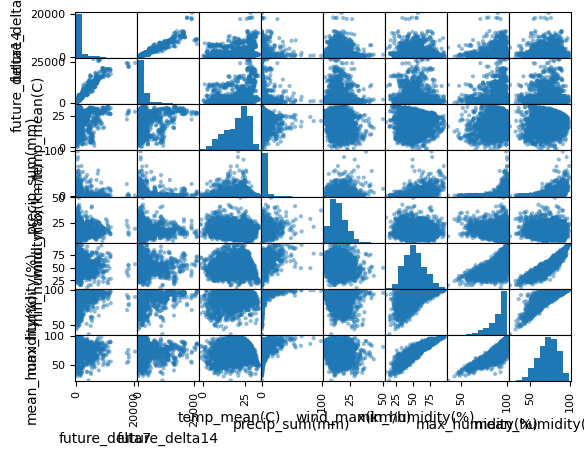

In [11]:
# Analyze sparse weather features
pd.plotting.scatter_matrix(sparse_weather_covid_df[weather_features])

array([[<AxesSubplot: xlabel='future_delta7', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='future_delta14', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='total_cases', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='new_cases', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='past_delta14', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='population', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='pop_density', ylabel='future_delta7'>],
       [<AxesSubplot: xlabel='future_delta7', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='future_delta14', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='total_cases', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='new_cases', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='past_delta14', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='population', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='pop_density', ylabel='future_delta14'>],
       [<AxesSubplo

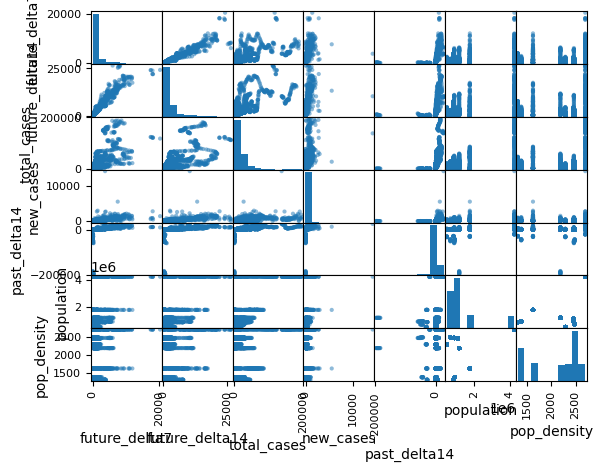

In [12]:
# Analyze sparse county features
pd.plotting.scatter_matrix(sparse_weather_covid_df[county_features])

array([[<AxesSubplot: xlabel='future_delta7', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='future_delta14', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='temp_mean(C)', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='precip_sum(mm)', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='wind_max(km/h)', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='min_humidity(%)', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='max_humidity(%)', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='mean_humidity(%)', ylabel='future_delta7'>],
       [<AxesSubplot: xlabel='future_delta7', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='future_delta14', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='temp_mean(C)', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='precip_sum(mm)', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='wind_max(km/h)', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='min_humidity(%)', ylabel='futu

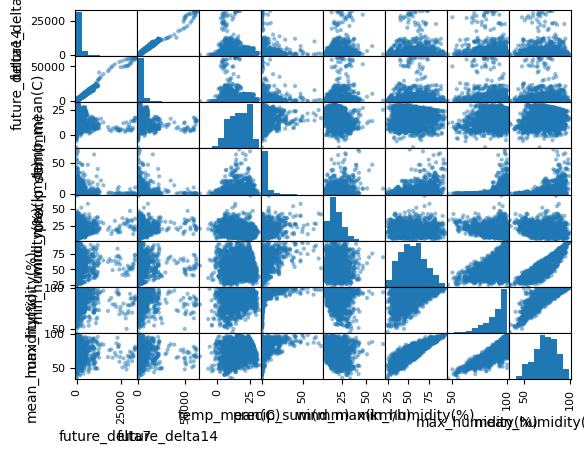

In [13]:
# Analyze dense weather features
pd.plotting.scatter_matrix(dense_weather_covid_df[weather_features])

array([[<AxesSubplot: xlabel='future_delta7', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='future_delta14', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='total_cases', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='new_cases', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='past_delta14', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='population', ylabel='future_delta7'>,
        <AxesSubplot: xlabel='pop_density', ylabel='future_delta7'>],
       [<AxesSubplot: xlabel='future_delta7', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='future_delta14', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='total_cases', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='new_cases', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='past_delta14', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='population', ylabel='future_delta14'>,
        <AxesSubplot: xlabel='pop_density', ylabel='future_delta14'>],
       [<AxesSubplo

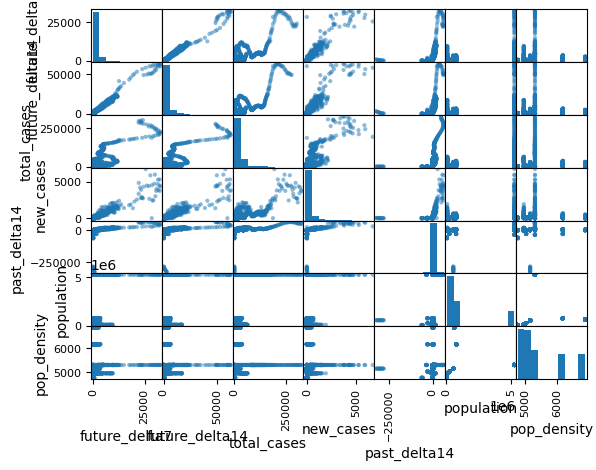

In [14]:
# Analyze dense county features
pd.plotting.scatter_matrix(dense_weather_covid_df[county_features])

# Prepare Data for model

## Sparse Data Model

In [15]:
# Split data into Training and Testing Sets
features = ['past_delta14','pop_density','population','new_cases','temp_mean(C)','precip_sum(mm)','wind_max(km/h)','min_humidity(%)','max_humidity(%)','mean_humidity(%)']
target = ['future_delta14']

# Drop rows with null data
sparse = sparse_weather_covid_df.dropna()

X = sparse[features]
y = sparse[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)


In [16]:
# Use linear regression model
sparse_model = LinearRegression()

In [17]:
# Sparse 14-day new case prediction model
sparse_model.fit(X_train,y_train)
training_score = sparse_model.score(X_train,y_train)
testing_score = sparse_model.score(X_test,y_test)

print(f"Sparse 14-day New Case Training Score: {training_score}")
print(f"Sparse 14-day New Case Testing Score: {testing_score}")

Sparse 14-day New Case Training Score: 0.5333855574734403
Sparse 14-day New Case Testing Score: 0.5533243754456745


## Dense Data Model

In [18]:
# Split data into Training and Testing Sets
features = ['past_delta14','pop_density','population','new_cases','temp_mean(C)','precip_sum(mm)','wind_max(km/h)','min_humidity(%)','max_humidity(%)','mean_humidity(%)']
target = ['future_delta14']

# Drop rows with null data
dense = dense_weather_covid_df.dropna()

X = dense[features]
y = dense[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [19]:
# Use linear regression model
dense_model = LinearRegression()

In [20]:
# Dense 14-day new case prediction model
dense_model.fit(X_train,y_train)
training_score = dense_model.score(X_train,y_train)
testing_score = dense_model.score(X_test,y_test)

print(f"Dense 14-day New Case Training Score: {training_score}")
print(f"Dense 14-day New Case Testing Score: {testing_score}")

Dense 14-day New Case Training Score: 0.8519537925041163
Dense 14-day New Case Testing Score: 0.860031095930641
